enter only one main skill for recommendation:
have no any recommended resume
enter skill :python,ml,dl,ai
enter degree :mca
enter exp :0
your required resume is : 
     p_id                  skill_name  degree_name  work_exp     score
38  36.0             python,ml,dl,ai        be,me       2.0  1.000000
27  16.0             python,ml,dl,ai           be       2.5  1.000000
15  33.0             ai,dl,ml,python          mca       7.0  1.000000
37  32.0                python,ml,ai        btech       1.5  0.866025
43  43.0                python,ml,dl           be       2.0  0.866025
32  24.0        android,ml,dl,python        be,me       2.0  0.750000
23   9.0         ml,dl,python,c,java           be       4.0  0.750000
42  42.0          ml,dl,python,c,nlp           be       5.0  0.750000
13  26.0  java,.net,ml,dl,python,php          bca       2.5  0.612372
25  13.0              ml,python,.net           me       1.0  0.577350
19   1.0            java,c,python,ml        be,me       2.0  0.57

C:\Users\Sachin Koradiya\Anaconda3\lib\site-packages\pandas\core\frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Empty DataFrame
Columns: [skill_name, degree_name, work_exp]
Index: []


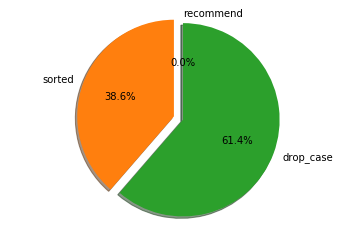

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine("mysql://root:@localhost/resume_data", pool_size=10, max_overflow=20)
try:
    df = pd.read_csv(r"C:\Users\Sachin Koradiya\fusion\mode.csv")
    cv = pd.read_csv(r"C:\Users\Sachin Koradiya\fusion\mode.csv")
    s_key = input("enter only one main skill for recommendation:")
    s_key = list(s_key.split(" "))
    s_same_temp = ""
    for i in s_key:
        s_same_temp += i + ", "
    s_same_temp = s_same_temp[:-2]
    y = len(df)
    x = y-1
   

    ratings_data = pd.read_csv(r"C:\Users\Sachin Koradiya\fusion\sort.csv")  
    #ratings_data.head()

    skill_names = pd.read_csv(r"C:\Users\Sachin Koradiya\fusion\skill_id.csv")  
    #skill_names.head()  

    skill_data = pd.merge(ratings_data, skill_names, on='skill_id')
    #skill_data.head()

    skill_data.groupby('skill')['rating'].mean().head()

    skill_data.groupby('skill')['rating'].mean().sort_values(ascending=False).head()

    skill_data.groupby('skill')['rating'].count().sort_values(ascending=False).head()

    ratings_mean_count = pd.DataFrame(skill_data.groupby('skill')['rating'].mean())
    #print(ratings_mean_count)
    ratings_mean_count['rating_counts'] = pd.DataFrame(skill_data.groupby('skill')['rating'].count())
    #ratings_mean_count.head() 
    user_skill_rating = skill_data.pivot_table(index='p_id', columns='skill', values='rating')
    #user_skill_rating.head()
    forrest_gump_ratings = user_skill_rating[s_same_temp]
    #forrest_gump_ratings.head(10) 

    skill_like_forest_gump = user_skill_rating.corrwith(forrest_gump_ratings)

    corr_forrest_gump = pd.DataFrame(skill_like_forest_gump, columns=['Correlation'])
    corr_forrest_gump.dropna(inplace=True)

    same = corr_forrest_gump.index.values
    print("similar skill is : ",same)
    same_temp = ""
    for i in same:
        same_temp += i + ", "
    same_temp = same_temp[:-2]
    df = df.append({'skill_name' : same_temp  , 'work_exp' : 100} , ignore_index=True)
    a_le = (len(df)-1)
    y = len(df)
    x = y-1
    def clean_data(x):
        if isinstance(x, list):
            return [str.lower(i.replace(" ", "")) for i in x]
        else:
            return (x.replace(" ", "")).lower()

    df['skill_name'] = df['skill_name'].apply(clean_data)

    # Import CountVectorizer and create the count matrix
    from sklearn.feature_extraction.text import CountVectorizer

    count = CountVectorizer()
    count_matrix = count.fit_transform(df['skill_name'])

    # Compute the Cosine Similarity matrix based on the count_matrix
    from sklearn.metrics.pairwise import cosine_similarity

    cosine_sim = cosine_similarity(count_matrix, count_matrix)


    # Function that takes in skill name as input and outputs most similar skill
    def get_recommendations(index, cosine_sim=cosine_sim):
        # Get the index of the skill that matches the skill name
        idx = index

        # Get the pairwsie similarity scores of all skill with that skill
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the skill based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#         df2 = pd.DataFrame(sim_scores, columns = ['p_id','score'])
#         last_row = (len(df2)-1)
#         df2 = df2.drop(df2.index[last_row])
        # Get the scores of the 10 most similar skill
        x = len(df)
        sim_scores = sim_scores[0:x]
        drope_case = []
        item_indice = []
        for f in sim_scores:
            #print(f[1])
            if f[1]==0:
                continue
            else:
                item_indice.append(f)
        #print(item_indice)
        item_indices =  [i[0] for i in item_indice]


        # Return the top 10 most similar skill
        return df[["p_id","work_exp","skill_name","degree_name"]].iloc[item_indices]
    df1 = get_recommendations(x, cosine_sim)
    df1 = df1.dropna()
    print(df1)
    df1.to_sql('recommended', con=engine, if_exists='replace')
    rec_le = len(df1)
    def get_drope_case(index, cosine_sim=cosine_sim):
        # Get the index of the skill that matches the skill name
        idx = index

        # Get the pairwsie similarity scores of all skill with that skill
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the skill based on the similarity score
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get the scores of the 10 most similar skill
        x = len(df)
        sim_scores = sim_scores[0:x]
        drope_case = []
        for f in sim_scores:
            #print(f[1])
            if f[1]==0:
                drope_case.append(f)
            else:
                continue
        #print(item_indice)
        drope_cases =  [i[0] for i in drope_case]


        # Return the top 10 most similar skill
        return df[["p_id","work_exp","skill_name","degree_name"]].iloc[drope_cases]
    dfd = get_drope_case(x, cosine_sim)
    #print("drop case is : \n",dfd)
except:
    print("have no any recommended resume")
    # Function that takes in skill as input and outputs most similar skill
    df1 = pd.read_csv(r"C:\Users\Sachin Koradiya\fusion\mode.csv")
    dfd = pd.DataFrame()
    rec_le = 0
    
s_key = input("enter skill :")
s_key = list(s_key.split(" "))
s_same_temp = ""
for i in s_key:
    s_same_temp += i + ", "
s_same_temp = s_same_temp[:-2]

d_key = input("enter degree :")
try:
    disc = {
        "me" : ["be,me"],
        "mca" : ["bca,mca"],
        "mtech" : ["btech,mtech"],
        "mscit" : ["bsdit,mscit"]
    }
    de_key = disc[d_key]
except:
    de_key = list(d_key.split(" "))
d_same_temp = ""
for i in de_key:
    d_same_temp += i + ", "
d_same_temp = d_same_temp[:-2]

    
e_key = input("enter exp :")
if e_key is '':
    i_key=0
else:
    i_key = int(e_key)    
    # s_same_temp=["python","ml","dl"]
    # d_same_temp=["be"]
    # e_same_temp=["44"]


df1 = df1.append({'skill_name' : s_same_temp , 'degree_name' : d_same_temp} , ignore_index=True)
#df1['sd'] = df1[['skill_name','degree_name']].apply(lambda x : '{},{}'.format(x[0],x[1]), axis=1)
#df1 = df1.sort_values(by='accuracy', ascending=False)
#print(df1)
y = len(df1)
x = y-1
#print(df)
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        return (x.replace(" ", "")).lower()

df1['degree_name'] = df1['degree_name'].apply(clean_data)
from sklearn.feature_extraction.text import CountVectorizer


count = CountVectorizer()
count_matrix = count.fit_transform(df1['degree_name'])

#print(count_matrix)
    # Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)
def get_recommendations(index, cosine_sim=cosine_sim):
    idx = index
    x = len(df1)
    #print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print(sim_scores)
    sim_scores = sim_scores[0:x]
    item_indices = [i[0] for i in sim_scores]
    item_indice= []
    for f in sim_scores:
            #print(f[1])
        if f[1]==0:
             continue
        else:
             item_indice.append(f)
    #print(item_indice)
    item_indice =  [i[0] for i in sim_scores]

    item_indices_val =  [i[1] for i in sim_scores]
#     for j in item_indices_val:
#         lis.append(j)
    return df1[["p_id","skill_name","degree_name","work_exp"]].iloc[item_indice]
df1 = get_recommendations(x, cosine_sim)
df1 = df1.dropna()
df1

df1 = df1.append({'skill_name' : s_same_temp , 'degree_name' : d_same_temp} , ignore_index=True)
#df1['sd'] = df1[['skill_name','degree_name']].apply(lambda x : '{},{}'.format(x[0],x[1]), axis=1)
#df1 = df1.sort_values(by='accuracy', ascending=False)
#print(df1)
y = len(df1)
x = y-1
#print(df)
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        return (x.replace(" ", "")).lower()

df1['skill_name'] = df1['skill_name'].apply(clean_data)
#print(df1)

    # Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer


count = CountVectorizer()
count_matrix = count.fit_transform(df1['skill_name'])

    #print(count_matrix)
    # Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)
    #print(cosine_sim)

def get_drope_case(index, cosine_sim=cosine_sim):
        # Get the index of the skill that matches the skill name
    idx = index

        # Get the pairwsie similarity scores of all skill with that skill
    sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the skill based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get the scores of the 10 most similar skill
    x = len(df1)
    sim_scores = sim_scores[0:x]
    #print(sim_scores)
    drope_case = []
    for f in sim_scores:
            #print(f[1])
        if f[1]==0:
            drope_case.append(f)
        else:
            continue
        #print(item_indice)
    drope_cases =  [i[0] for i in drope_case]


        # Return the top 10 most similar skill
    return df1[["p_id","work_exp","skill_name","degree_name"]].iloc[drope_cases]
dfl = get_drope_case(x, cosine_sim)
dc = dfd.append(dfl)
dc["score"] = 0
dc = dc.dropna()
#print("dc",dc)
lis = []
def get_recommendations(index, cosine_sim=cosine_sim):
    idx = index
    x = len(df1)
    #print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print(sim_scores)
    sim_scores = sim_scores[0:x]
    item_indices = [i[0] for i in sim_scores]
    item_indice= []
    for f in sim_scores:
            #print(f[1])
        if f[1]==0:
             continue
        else:
             item_indice.append(f)
        #print(item_indice)
    item_indices =  [i[0] for i in item_indice]

    item_indices_val =  [i[1] for i in item_indice]
    for j in item_indices_val:
        lis.append(j)
    return df1[["p_id","skill_name","degree_name","work_exp"]].iloc[item_indices]
df1 = get_recommendations(x, cosine_sim)
df1 = df1.dropna()

if not lis:
    pass
else:
    lis.pop(0)
#print(lis)
df1['score']=lis
# df1 = df1[df1.degree_name == "be"]
# df1
df1 = df1.sort_values(['score', 'work_exp'], ascending=[False,True])
df2 = df1[df1.work_exp >=i_key]
print("your required resume is : \n",df2)
dfz = df1[df1.work_exp < i_key]
#print("dfz",dfz)
d = dc.append(dfz)
#print("drop_case : \n",d)

# #engine = create_engine('mysql+pymysql://root:@localhost:3307/resume_data')
df2.to_sql('sorting', con=engine, if_exists='replace')
d.to_sql('dropcase', con=engine, if_exists='replace')

o_le = len(df2)
#print(o_le)
d_le = len(d)
#print(d_le)
a_le = len(cv)
#print(a_le)
try:
    sac = df2["score"]
    so = []
    for s in sac:
        so.append(s)
    sac = so[0]
except:
    pass
required = pd.DataFrame(columns = ['skill_name', 'degree_name','work_exp'])
if a_le==d_le:
    required = required.append({'skill_name' : s_same_temp , 'degree_name' : d_key, 'work_exp' : e_key} , ignore_index=True)
elif sac <= 0.34:
    required = required.append({'skill_name' : s_same_temp , 'degree_name' : d_key, 'work_exp' : e_key} , ignore_index=True)
else:
    pass

required.to_sql('required', con=engine, if_exists='append')
print(required)
r_le = len(required)
# from sqlalchemy import create_engine
# import pandas as pd
# con = create_engine("mysql://root:@localhost/resume_data", pool_size=10, max_overflow=20)
# ds = pd.read_sql_table("required", con,coerce_float=True)
# count = ds['skill_name'].value_counts()
# print(count)
# grouped = ds.groupby('skill_name')
# for name,group in grouped:
#     print(name)
#     print (group)


labels = 'recommend', 'sorted', 'drop_case'
sizes = [rec_le,o_le,d_le]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()